In [3]:
import torch
import matplotlib.pyplot as plt
torch.manual_seed(0)

In [4]:
# Synthetic linear data: y = 3x + 2 + noise
N = 100
x = torch.linspace(-1.0, 1.0, N).unsqueeze(1)   # shape (N,1)
true_w = 3.0
true_b = 2.0
y = true_w * x + true_b + 0.3 * torch.randn_like(x)

In [5]:
# Initialize parameters
w = torch.randn(1,1, requires_grad=True)  # shape (1,1)
b = torch.randn(1, requires_grad=True)    # shape (1,)

lr = 0.1
num_epochs = 200

for epoch in range(num_epochs):
    # Forward pass
    y_pred = x.mm(w) + b    # matrix multiply so shapes align
    loss = ((y_pred - y) ** 2).mean()   # MSE

    # Backward pass
    loss.backward()

    # Manual parameter update (no optimizer)
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

        # zero gradients
        w.grad.zero_()
        b.grad.zero_()

    if epoch % 25 == 0:
        print(f"Epoch {epoch:4d}  loss: {loss.item():.6f}")

Epoch    0  loss: 4.946935
Epoch   25  loss: 0.122744
Epoch   50  loss: 0.095287
Epoch   75  loss: 0.094478
Epoch  100  loss: 0.094454
Epoch  125  loss: 0.094453
Epoch  150  loss: 0.094453
Epoch  175  loss: 0.094453


Learned w: 2.999598264694214  Learned b: 2.0111420154571533


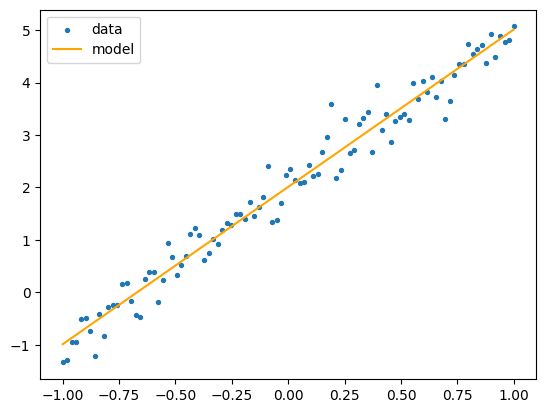

In [6]:
print("Learned w:", w.item(), " Learned b:", b.item())
# plot
plt.scatter(x.numpy(), y.numpy(), label='data', s=8)
x_line = torch.linspace(-1,1,100).unsqueeze(1)
y_line = x_line.mm(w) + b
plt.plot(x_line.numpy(), y_line.detach().numpy(), color='orange', label='model')
plt.legend()
plt.show()

In [7]:
# Save small dict (w and b)
model_state = {'w': w.detach(), 'b': b.detach()}
torch.save(model_state, '../models/linear_model.pth')
print("Saved model to ../models/linear_model.pth")

Saved model to ../models/linear_model.pth
